# 원, 삼각형, 사각형 구분하기
## 구글 코랩에서 작업
## 1. CNN 모델

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

Using TensorFlow backend.


### 데이터 준비하기

In [ ]:
!unzip 2017-3-8_CNN_Getting_Started_handwriting_shape.zip

### 데이터셋 생성하기

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 모델 구성하기

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

### 모델 그래프로 보기

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

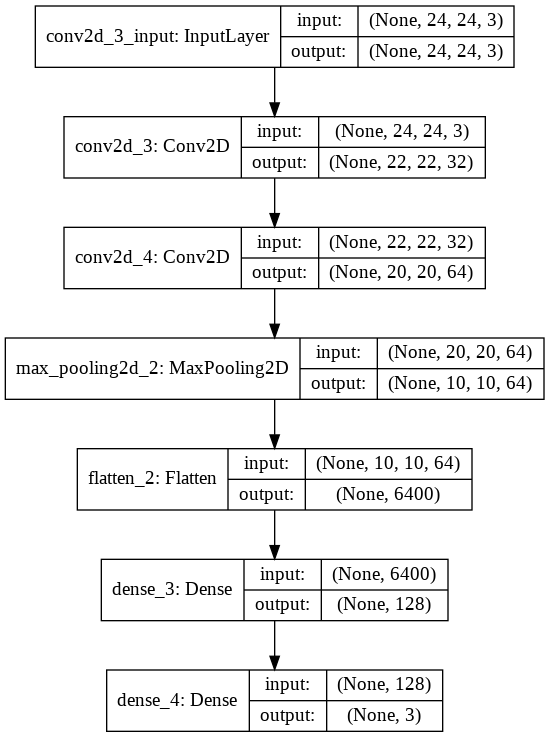

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'

### 모델 학습과정 설정하기

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0904 00:37:45.061057 139700939556736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 00:37:45.098518 139700939556736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



### 모델 학습시키기
- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 train_generator으로 지정.
- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정. 100번을 반복적으로 학습.
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 validation_generator으로 지정.
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정.

In [16]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

W0904 00:44:11.679368 139700939556736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 00:44:11.854867 139700939556736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
15/15 [==============================] - 1s 90ms/step - loss: 0.7682 - acc: 0.6000 - val_loss: 0.2908 - val_acc: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 22ms/step - loss: 0.1517 - acc: 0.9778 - val_loss: 0.0460 - val_acc: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 27ms/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.0412 - val_acc: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0192 - val_acc: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 27ms/step - loss: 6.2164e-04 - acc: 1.0000 - val_loss: 0.0324 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 26ms/step - loss: 3.3142e-04 - acc: 1.0000 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 27ms/step - loss: 1.8091e-04 - acc: 1.0000 - val_loss: 0.0185 - val_acc: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 26ms/step - loss

### 모델 평가하기

In [17]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


### 모델 사용하기

In [18]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.003 0.997]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.001 0.999]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.089 0.865 0.046]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]]
